In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
######################################################################## UTILITY FUNCTIONS ######################################################################################

In [76]:
''' converts from '.csv' file with no header to a numpy array'''
def extractData(s):
  data_df = pd.read_csv(s, header = None)
  return data_df.to_numpy()

In [77]:
''' returns np array with values scaled data by the formula : (x-mean)/(standard deviation) '''
def meanScaling(data):
  mean = np.mean(data, axis=0)

  std = np.std(data, axis=0)
  for i in range(std.size):
    std[i] = 1 if (std[i] == False) else (std[i] == std[i])
    
  return ((data - np.mean(data, axis=0))/std)

In [78]:
''' returns np array with sigmoid value of each entry : sigmoid(x) = 1/(1+exp(-x)) '''
def sigmoid (data):
  data = np.round_(data, 5)
  return (1/(1 + np.exp(-data)))

In [79]:
''' return matrix with an added bias row (of all ones) as the first row of the given matrix '''
def addBias(X):
  m = X.shape[0]
  u = np.ones((m,1))
  X = np.append(u, X, axis = 1)
  return X

In [80]:
#################################################################################################################################################################################

In [81]:
'''Converts vector with each entry representing class number to probability matrix with zeros and ones'''
def vectorToMatrix(y, num_class):
  m = y.size
  Y = np.zeros((m, num_class))
  count = 0
  for i in y:
    Y[count][i-1] = 1
    count +=1
  
  return Y

In [82]:
'''Converts probability matrix to vector with each entry representing class number'''
def matrixToVector(a):
  y = np.argmax(a, axis=1)+1
  y.shape = (y.size, 1)
  return y

In [83]:
'''Calculates accuracy as (number of correct predictions) *100/(total number of predictions)'''
def accuracy(hypothesis, y):

  count = 0
  for i in range(hypothesis.size):
    if y[i]==hypothesis[i]:
      count+=1

  accuracy = (count*100)/hypothesis.size

  return accuracy

In [84]:
#################################################################################################################################################################################

In [85]:
'''Calculates regiularised cost for classification'''
def regCost(hypothesis, y, theta1, theta2, reg_coeff):
  m = y.shape[0]
  cost = (-1/m)*(np.sum( y*np.log(hypothesis)) + np.sum((1-y)*np.log(1-hypothesis) ))
  reg =  reg_coeff*(np.sum(theta1**2) + np.sum(theta2**2))/(2*m)
  return cost+reg

In [86]:
'''Calculates Root Mean Squared Error'''
def rmse(hypothesis, y):
  diff = hypothesis - y
  error = np.sqrt(np.mean(diff**2))

In [94]:
def NNClassificationTrain(X, y, num_classes, num_iter, alpha, reg_coeff):

  '''
  X             --> Design matrix of training examples
  y             --> Training class vector
  num_classes   --> number of classes
  num_iter      --> number of iterations
  alpha         -->learning rate
  reg_coeff     --> regularisation coefficiet
  '''

  #Concertinf class vector to probability matrix
  Y = vectorToMatrix(y, num_classes)

  m = X.shape[0]
  n = [X.shape[1], 2*num_classes, num_classes]
  # m --> number of training examples
  # n[0] --> number of units in input layer
  # n[1] --> number of units in hidden layer
  # n[2] --> number of units in output layer

  #Scaling and adding biad row to design matrix
  X = meanScaling(X)
  X = addBias(X)

  cost = []

  #initializing theta
  theta1 = np.random.randn(n[0]+1, n[1]) * np.sqrt(6/(n[0] + n[1]))
  theta2 = np.random.randn(n[1]+1, n[2]) * np.sqrt(6/(n[1] + n[2]))

  #training loop
  for i in range(num_iter):

    theta1_reg = theta1
    theta1_reg[0] = np.zeros((1, n[1]))

    theta2_reg = theta2
    theta2_reg = np.zeros((1, n[2]))

    # Foreward propagation
    a1 = sigmoid(X@theta1)
    a1 = addBias(a1)

    hypothesis = sigmoid(a1@theta2)

    # cost
    cost.append(regCost(hypothesis, Y, theta1_reg, theta2_reg, reg_coeff))

    # Backpropagation (grad)
    del3 = hypothesis - Y
    del2 = del3@(theta2.T) * a1 * (1-a1)

    DEL2 = (a1.T)@del3 + reg_coeff*theta2_reg
    DEL1 = (X.T)@del2[:,1:] + reg_coeff*theta1_reg

    # Gradient Decent
    
    theta1 -= alpha*DEL1
    theta2 -= alpha*DEL2

    print(i, "cost = ", cost[i])

  print(cost[-10:])
  plt.plot(cost)
  
  return theta1, theta2

In [88]:
def NNClassificationTest(X, y, theta1, theta2):

  '''
  X        --> Design matrix of features of testing data
  y        --> Target value vector of testing data
  theta1   --> parameter for input layer to hidden layer obtained after training
  theta2   --> parameter for hidden layer to output layer obtained after training
  '''

  #Scaling and adding biad row to design matrix
  X = meanScaling(X)
  X = addBias(X)

  # Foreward propagation
  a1 = sigmoid(X@theta1)
  a1 = addBias(a1)

  hypothesis = matrixToVector(sigmoid(a1@theta2))
    
  print('Accuracy =', accuracy(hypothesis, y),'%')

  return hypothesis

In [89]:
data_train = extractData('/content/drive/MyDrive/WOC/Datasets/emnist-letters-train.csv')
X_train, y_train = data_train[:, 1:], data_train[:,0]

In [90]:
data_test = extractData('/content/drive/MyDrive/WOC/Datasets/emnist-letters-test.csv')
X_test, y_test = data_test[:, 1:], data_test[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


0 cost =  23.187547073395166
1 cost =  24.952634316940014
2 cost =  20.754499659552714
3 cost =  17.536504083220812
4 cost =  14.892584607616085
5 cost =  12.720979325839647
6 cost =  10.837099250418223
7 cost =  9.204599662434024
8 cost =  7.781277386017253
9 cost =  6.505001978021957
10 cost =  5.526734277463555
11 cost =  4.5785000144633425
12 cost =  4.086428731909978
13 cost =  3.7620746963172413
14 cost =  3.5574698662589976
15 cost =  3.278378446666904
16 cost =  3.234087256030231
17 cost =  3.0882267858198484
18 cost =  3.048016860156378
19 cost =  2.920656304139688
20 cost =  2.8557828577644133
21 cost =  2.757862721413796
22 cost =  2.7225243057252206
23 cost =  2.633900914130199
24 cost =  2.5960006431308087
25 cost =  2.52781585005666
26 cost =  2.4971092062217486
27 cost =  2.450434031502536
28 cost =  2.4339115276406336
29 cost =  2.394332047949403
30 cost =  2.3637421400132235
31 cost =  2.3243230375502497
32 cost =  2.30249703789688
33 cost =  2.2721976225536493
34 cost

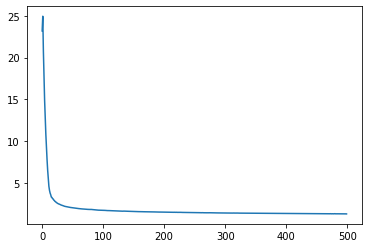

In [95]:
theta1, theta2 = NNClassificationTrain(X_train, y_train, 26, 500, 4.4e-5, 0.06)

In [96]:
hypothesis = NNClassificationTest(X_train, y_train, theta1, theta2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Accuracy = 79.93243243243244 %


In [97]:
hypothesis = NNClassificationTest(X_test, y_test, theta1, theta2)

Accuracy = 73.08108108108108 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
